In [1]:
import sklearn

from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import VarianceThreshold

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

In [2]:
data = pd.read_csv("cases_deaths_vaccines_cleaned.csv")

display(data)

,day_count,date,state,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,...,conf_cases,tot_death,conf_death,total_population,cases_population_proportion,deaths_population_proportion,mean_daily_cases_proportion,above_daily_mean,above_daily_median,median_daily_cases_proportion
0,1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,...,327128.0,5760,4862.0,4888949,0.084066,0.001178,0.072371,1,1,0.075992
1,3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,...,332085.0,6030,5038.0,4888949,0.085402,0.001233,0.073610,1,1,0.077392
2,7,2021-01-19,Alabama,130795.0,444650.0,114319.0,0.33,2.67,16346.0,2.33,...,338983.0,6126,5101.0,4888949,0.087246,0.001253,0.075396,1,1,0.078899
3,8,2021-01-20,Alabama,139200.0,483275.0,121113.0,0.37,2.84,17956.0,2.47,...,340887.0,6283,5211.0,4888949,0.087883,0.001285,0.075903,1,1,0.079340
4,9,2021-01-21,Alabama,165919.0,493125.0,144429.0,0.44,3.38,21345.0,2.95,...,342982.0,6379,5279.0,4888949,0.088472,0.001305,0.076429,1,1,0.080090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,3719,2021-03-24,Wyoming,235424.0,336475.0,142147.0,15.97,40.68,92428.0,24.56,...,47298.0,695,695.0,573720,0.097412,0.001211,0.090616,1,1,0.095573
1674,3720,2021-03-25,Wyoming,242919.0,350735.0,146634.0,16.54,41.97,95709.0,25.34,...,47322.0,695,695.0,573720,0.097469,0.001211,0.090823,1,1,0.095799
1675,3721,2021-03-26,Wyoming,243336.0,351435.0,146888.0,16.56,42.04,95871.0,25.38,...,47438.0,695,695.0,573720,0.097689,0.001211,0.091033,1,1,0.096094
1676,3722,2021-03-27,Wyoming,243604.0,353975.0,147098.0,16.61,42.09,96104.0,25.42,...,47438.0,695,695.0,573720,0.097689,0.001211,0.091185,1,1,0.096482


In [3]:
selected_features = ["total_vaccinations", "total_distributed", "people_vaccinated", "people_fully_vaccinated_per_hundred",
                     "total_vaccinations_per_hundred", "people_fully_vaccinated", "people_vaccinated_per_hundred",
                     "distributed_per_hundred", "daily_vaccinations_raw", "daily_vaccinations",
                     "daily_vaccinations_per_million", "cases_population_proportion", "deaths_population_proportion"
                     "share_doses_used", "tot_cases", "conf_cases", "tot_death", "conf_death", "total_population",
                     "median_daily_cases_proportion", "mean_daily_cases_proportion", "above_daily_mean", "above_daily_median"]

In [4]:
'''
selected_features = ["people_fully_vaccinated_per_hundred",
                     "total_vaccinations_per_hundred", "people_vaccinated_per_hundred",
                     "distributed_per_hundred", "daily_vaccinations_per_million", 
                     "above_daily_mean", "above_daily_median"]
'''

selected_features = ["total_vaccinations", "total_distributed", "people_vaccinated", "people_fully_vaccinated_per_hundred",
                     "total_vaccinations_per_hundred", "people_fully_vaccinated", "people_vaccinated_per_hundred",
                     "distributed_per_hundred", "daily_vaccinations_raw", "daily_vaccinations",
                     "daily_vaccinations_per_million", "share_doses_used", "above_daily_mean", "above_daily_median"]

dtc_data = data[selected_features]

dtc = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(dtc_data.drop(['above_daily_mean', 'above_daily_median'], axis=1), dtc_data['above_daily_mean'], test_size=0.2)

dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

importance_mean = dtc.feature_importances_

print('above daily mean prediction: ' + str(accuracy_score(y_test, y_pred)))

X_train, X_test, y_train, y_test = train_test_split(dtc_data.drop(['above_daily_mean', 'above_daily_median'], axis=1), dtc_data['above_daily_median'], test_size=0.2)

dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

importance_median = dtc.feature_importances_

print('above daily median prediction: ' + str(accuracy_score(y_test, y_pred)))

above daily mean prediction: 0.8273809523809523
above daily median prediction: 0.7767857142857143


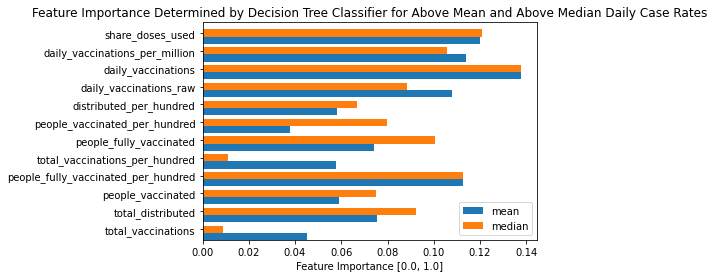

In [5]:
# plot feature importance

plot_df = pd.DataFrame(dict(graph=selected_features[:-2], mn=importance_mean, md=importance_median)) 

ind = np.arange(len(plot_df))
width = 0.4

fig, ax = plt.subplots()
ax.barh(ind, plot_df.mn, width, label='mean')
ax.barh(ind + width, plot_df.md, width, label='median')

ax.set(yticks=ind + width, yticklabels=plot_df.graph, ylim=[2 * width - 1, len(plot_df)])
ax.legend()

plt.xlabel('Feature Importance [0.0, 1.0]')
plt.title('Feature Importance Determined by Decision Tree Classifier for Above Mean and Above Median Daily Case Rates')

plt.rcParams["figure.figsize"] = (20,10)

plt.show()

In [6]:
'''
selected_features = ["people_fully_vaccinated_per_hundred",
                     "total_vaccinations_per_hundred", "people_vaccinated_per_hundred",
                     "distributed_per_hundred", "daily_vaccinations_per_million", 
                     "above_daily_mean", "above_daily_median"]
'''

selected_features = ["total_vaccinations", "total_distributed", "people_vaccinated", "people_fully_vaccinated_per_hundred",
                     "total_vaccinations_per_hundred", "people_fully_vaccinated", "people_vaccinated_per_hundred",
                     "distributed_per_hundred", "daily_vaccinations_raw", "daily_vaccinations",
                     "daily_vaccinations_per_million", "share_doses_used", "above_daily_mean", "above_daily_median"]


rfc_data = data[selected_features]

rfc = RandomForestClassifier()

X_train, X_test, y_train, y_test = train_test_split(rfc_data.drop(['above_daily_mean', 'above_daily_median'], axis=1), rfc_data['above_daily_mean'], test_size=0.2)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

importance_mean = rfc.feature_importances_

print('above daily mean prediction: ' + str(accuracy_score(y_test, y_pred)))

X_train, X_test, y_train, y_test = train_test_split(rfc_data.drop(['above_daily_mean', 'above_daily_median'], axis=1), rfc_data['above_daily_median'], test_size=0.2)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

importance_median = rfc.feature_importances_

print('above daily median prediction: ' + str(accuracy_score(y_test, y_pred)))

above daily mean prediction: 0.8928571428571429
above daily median prediction: 0.8660714285714286


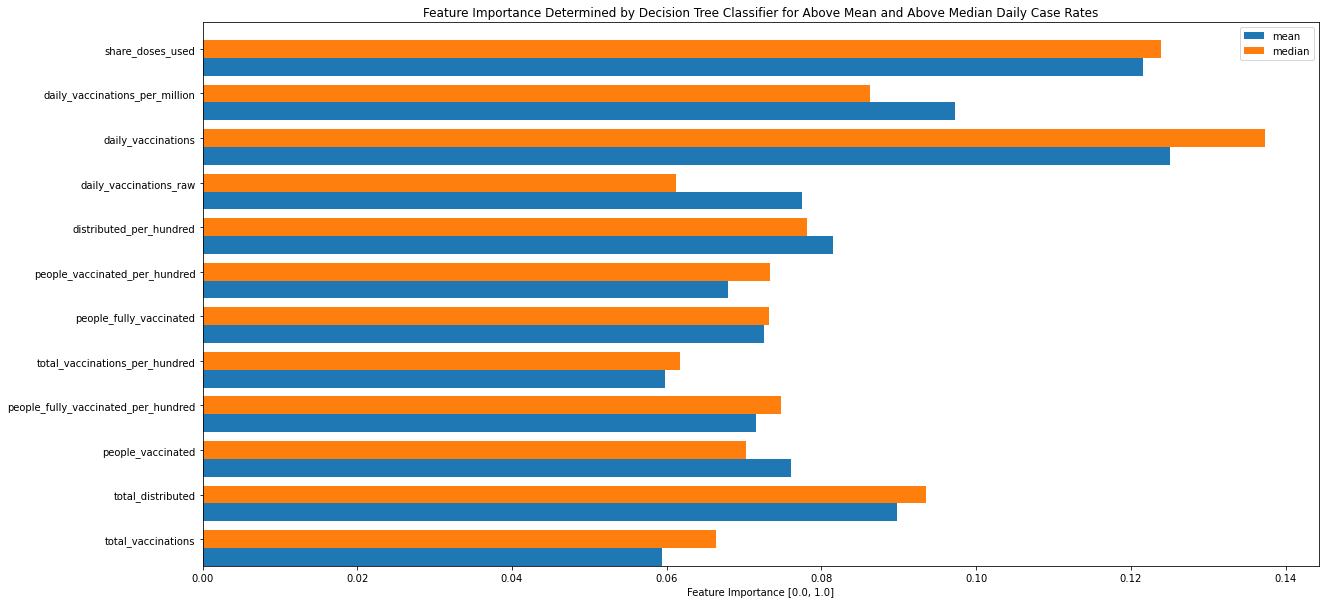

In [7]:
# plot feature importance

plot_df = pd.DataFrame(dict(graph=selected_features[:-2], mn=importance_mean, md=importance_median)) 

ind = np.arange(len(plot_df))
width = 0.4

fig, ax = plt.subplots()
ax.barh(ind, plot_df.mn, width, label='mean')
ax.barh(ind + width, plot_df.md, width, label='median')

ax.set(yticks=ind + width, yticklabels=plot_df.graph, ylim=[2 * width - 1, len(plot_df)])
ax.legend()

plt.xlabel('Feature Importance [0.0, 1.0]')
plt.title('Feature Importance Determined by Decision Tree Classifier for Above Mean and Above Median Daily Case Rates')

plt.rcParams["figure.figsize"] = (20,10)

plt.show()

In [8]:
selected_features = ["total_vaccinations", "total_distributed", "people_vaccinated", "people_fully_vaccinated_per_hundred",
                     "total_vaccinations_per_hundred", "people_fully_vaccinated", "people_vaccinated_per_hundred",
                     "distributed_per_hundred", "daily_vaccinations_raw", "daily_vaccinations",
                     "daily_vaccinations_per_million", "share_doses_used", "above_daily_mean", "above_daily_median", 
                    'cases_population_proportion']

rfr_data = data[selected_features]

rfr = RandomForestRegressor()

X_train, X_test, y_train, y_test = train_test_split(rfr_data.drop(['above_daily_mean', 'above_daily_median', 'cases_population_proportion'], axis=1), rfr_data['cases_population_proportion'], test_size=0.3)

rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

importance_mean = rfr.feature_importances_

print('MSE: ' + str(mean_squared_error(y_test, y_pred, squared=False)))

MSE: 0.014281642712063912


100.8


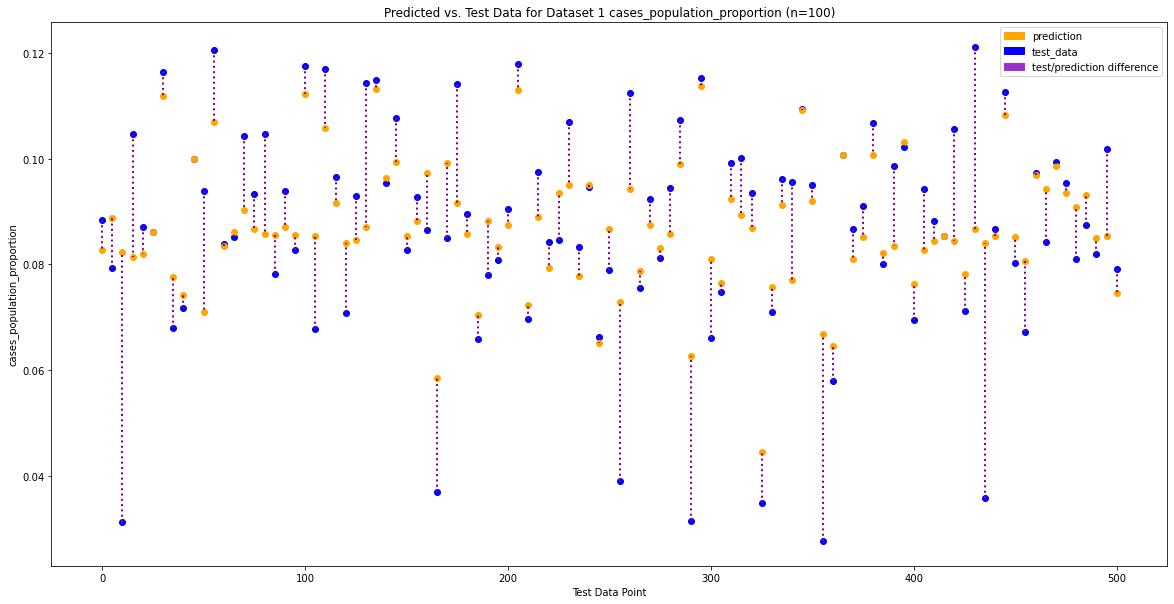

In [9]:
datapoint = np.arange(0, len(y_test))

y_test_list = y_test.to_list()

hop = np.arange(0, len(y_test_list), 5)

print(len(y_test_list) / 5)

for i in hop:

    plt.scatter(datapoint[i], y_test_list[i], color='blue')
    plt.scatter(datapoint[i], y_pred[i], color='orange')
    
    plt.vlines(x=i, ymin=y_test_list[i], ymax=y_pred[i], colors='purple', ls=':', lw=2, label='test')
    
    orange_patch = mpatches.Patch(color='orange', label='prediction')
    blue_patch = mpatches.Patch(color='blue', label='test_data')
    purple_patch = mpatches.Patch(color='darkorchid', label='test/prediction difference')
    plt.legend(handles=[orange_patch, blue_patch, purple_patch])
    
    plt.xlabel('Test Data Point')
    plt.ylabel('cases_population_proportion')
    plt.title('Predicted vs. Test Data for Dataset 1 cases_population_proportion (n=100)')
    
plt.rcParams["figure.figsize"] = (20,10)

plt.show()